In [65]:
import pandas as pd
import seaborn as sns
#import pandas_profiling
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.feature_extraction.text as text
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
!pip install contractions
import contractions
from collections import Counter
!pip install wordcloud
from wordcloud import WordCloud
from sklearn. preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('stopwords')
import numpy as np
warnings.filterwarnings('ignore')
import gensim
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16199\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\16199\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
data = pd.read_json('data.json',lines = True)

In [67]:
data

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [68]:
data['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [69]:
data.drop_duplicates(inplace = True)

In [70]:
data.drop_duplicates(subset=['headline', 'short_description'], inplace = True)

In [71]:
data.shape

(209038, 6)

In [72]:
data.isnull().values.any()

False

In [73]:
#EDA

Number of unique categories:  42


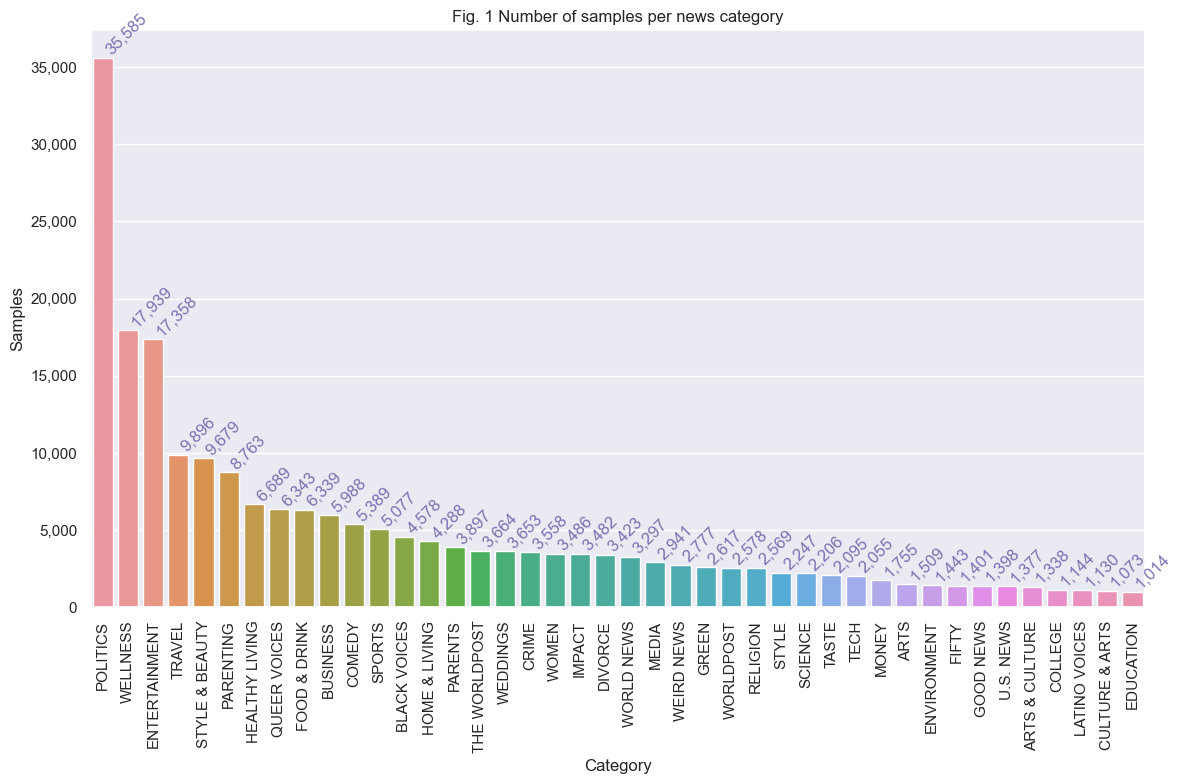

In [74]:
print('Number of unique categories: ',data.category.nunique())
pd_df= data.category.value_counts().to_frame().reset_index()
pd_df.columns = ['Category', 'Count']
#pd_df = pd_df.sort_values(['Count']).reset_index(drop=True)
plt.figure(figsize=(12,8))
plt.title("Fig. 1 Number of samples per news category")
# plot barh chart with index as x values
ax = sns.barplot(pd_df.index, pd_df.Count)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Category", ylabel='Samples')
ax.set_xticklabels(pd_df.Category)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(pd_df["Count"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

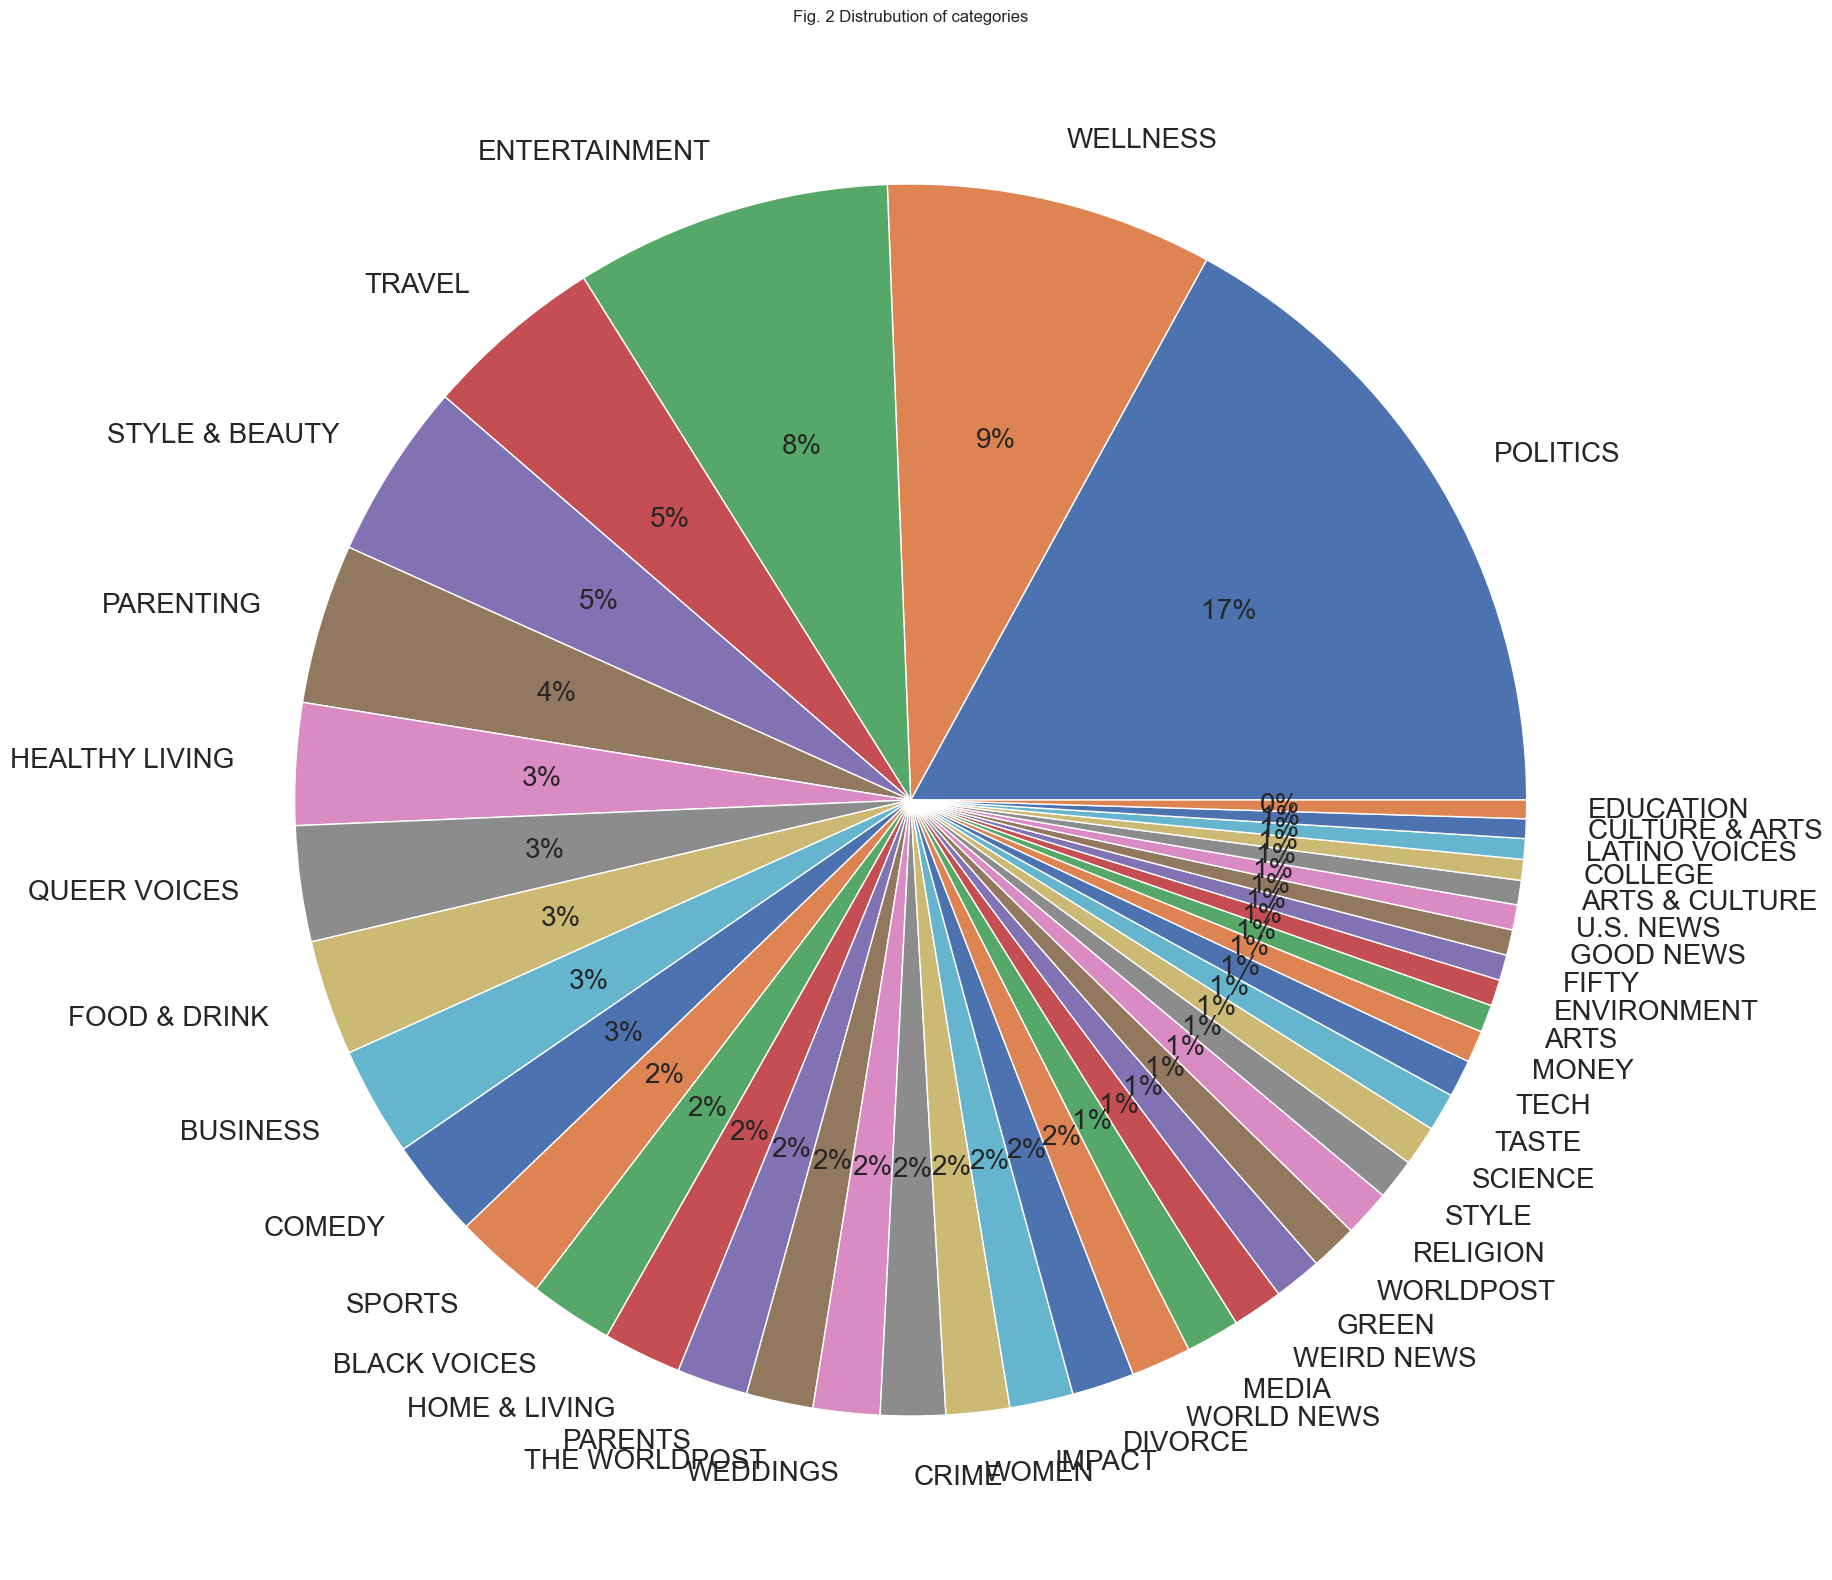

In [75]:
plt.figure(figsize = (30,20))
plt.title("Fig. 2 Distrubution of categories")
plt.pie(pd_df.Count, labels = pd_df.Category, autopct='%.0f%%',textprops={'fontsize': 20})
plt.show()

Number of Authors:  42
             Author  Count
0        David Moye   1067
1     Andy McDonald   1100
2    Curtis M. Wong   1146
3   Carly Ledbetter   1169
4      Cole Delbyck   1266
5  Reuters, Reuters   1563
6    Mary Papenfuss   1566
7          Ed Mazza   1590
8        Ron Dicker   2219
9         Lee Moran   2954


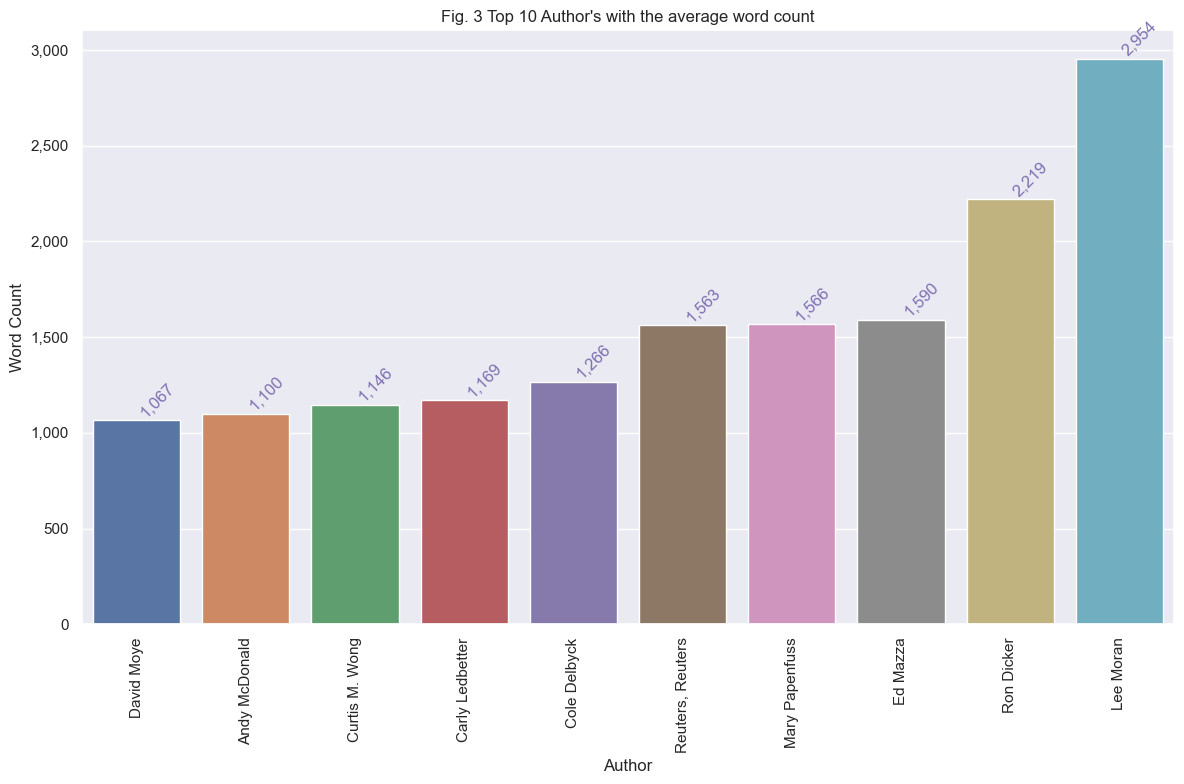

In [76]:
print('Number of Authors: ',data.category.nunique())
author_count = data.authors.value_counts().to_frame().reset_index()
author_count.columns = ['Author', 'Count']
author_count = author_count.drop(index=0)
author_count = author_count.loc[1:10, :]
author_count.head(10)
author_count = author_count.sort_values(['Count']).reset_index(drop=True)
print (author_count)
plt.figure(figsize=(12,8))
plt.title("Fig. 3 Top 10 Author's with the average word count")
ax = sns.barplot(author_count.index, author_count.Count)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Author", ylabel='Word Count')
ax.set_xticklabels(author_count.Author)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(author_count["Count"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()


In [77]:
def get_word_counts(line):
    return len(str(line).split())


In [78]:
df = data
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [79]:
def get_word_counts(line):
    return len(str(line).split())

In [80]:
df['all_words'] = df['headline']+" "+df['short_description']

In [81]:
df['all_words'][0]

'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.'

In [82]:
#Getting the total no of word count in headlines
df['Word Count in Headlines'] = df['headline'].apply(get_word_counts)
df['Word Count in Headlines'] 


0         11
1         13
2         13
3          9
4         11
          ..
209522     8
209523    10
209524    16
209525     8
209526     9
Name: Word Count in Headlines, Length: 209038, dtype: int64

In [83]:
#Getting the total no of word count in short_description
df['Word Count in Short Description'] = df['short_description'].apply(get_word_counts)
df['Word Count in Short Description']

0         29
1         28
2         12
3         25
4         25
          ..
209522    18
209523    20
209524    24
209525    20
209526    19
Name: Word Count in Short Description, Length: 209038, dtype: int64

In [84]:
#Getting the total no of word count of headlines and short description 
df['Total_Word_Count'] = df['all_words'].apply(get_word_counts)
df['Total_Word_Count'] 

0         40
1         41
2         25
3         34
4         36
          ..
209522    26
209523    30
209524    40
209525    28
209526    28
Name: Total_Word_Count, Length: 209038, dtype: int64

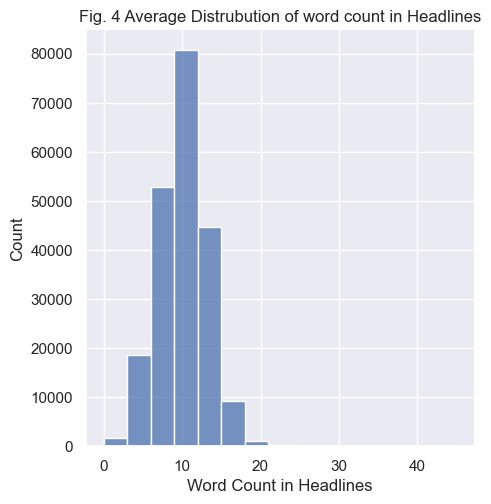

In [85]:
# Plotting Headline word count
sns.set(font_scale=1)

sns.displot(df, x="Word Count in Headlines", binwidth=3).set(
    title="Fig. 4 Average Distrubution of word count in Headlines")


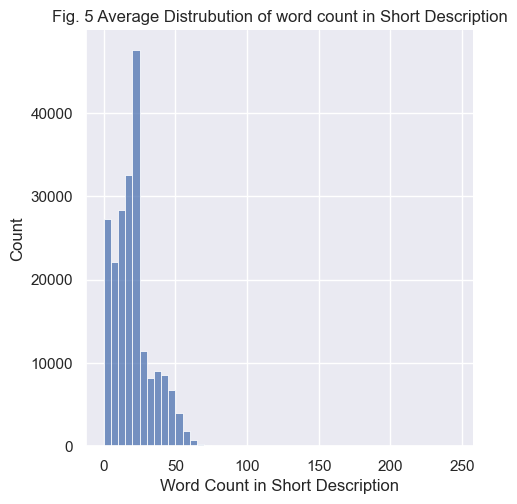

In [86]:
# Plotting Short description 
sns.set(font_scale=1)
sns.displot(df, x="Word Count in Short Description", binwidth=5).set(
    title="Fig. 5 Average Distrubution of word count in Short Description")

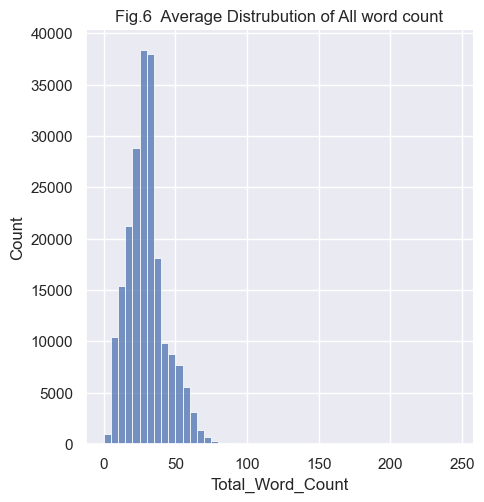

In [87]:
#Plooting all word count
sns.set(font_scale=1)
sns.displot(df, x="Total_Word_Count", binwidth=5).set(title="Fig.6  Average Distrubution of All word count")

In [88]:
# Getting the average of all word count by category
avg_word_length_by_category = df.loc[:,['category','Total_Word_Count']].groupby('category')\
.mean().reset_index().sort_values(['Total_Word_Count'], ascending= False)
avg_word_length_by_category

,category,Total_Word_Count
12,FIFTY,42.381870
38,WELLNESS,39.039188
22,PARENTING,38.463540
21,MONEY,36.645584
9,EDUCATION,36.418146
18,IMPACT,35.336875
36,WEDDINGS,34.898166
7,CULTURE & ARTS,34.803355
34,TRAVEL,34.758690
8,DIVORCE,34.756354


In [89]:
#Top 10 of the average word count by cateogry
avg_word_length_by_category_top10 = avg_word_length_by_category.head(10)
avg_word_length_by_category_top10['Total_Word_Count']=avg_word_length_by_category_top10['Total_Word_Count'].apply(np.int64)
avg_word_length_by_category_top10

,category,Total_Word_Count
12,FIFTY,42
38,WELLNESS,39
22,PARENTING,38
21,MONEY,36
9,EDUCATION,36
18,IMPACT,35
36,WEDDINGS,34
7,CULTURE & ARTS,34
34,TRAVEL,34
8,DIVORCE,34


In [90]:
# author_count.columns = ['category', 'Total Word Count']
# avg_word_length_by_category_top10 = avg_word_length_by_category_top10.sort_values(['Total Word Count']).reset_index(drop=True)
# plt.figure(figsize=(12,8))
# plt.title("categories with average word count")
# ax = sns.barplot(avg_word_length_by_category_top10.index, avg_word_length_by_category_top10.category)
# sns.barplot(data=avg_word_length_by_category_top10, x="Total Word Count", y="category")
# ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# ax.set(xlabel="Total Word Count", ylabel='category')
# ax.set_xticklabels(avg_word_length_by_category_top10.category)
# for item in ax.get_xticklabels(): item.set_rotation(90)
# for i, v in enumerate(avg_word_length_by_category_top10["Total Word Count"].iteritems()):        
#     ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
# plt.tight_layout()
# plt.show()


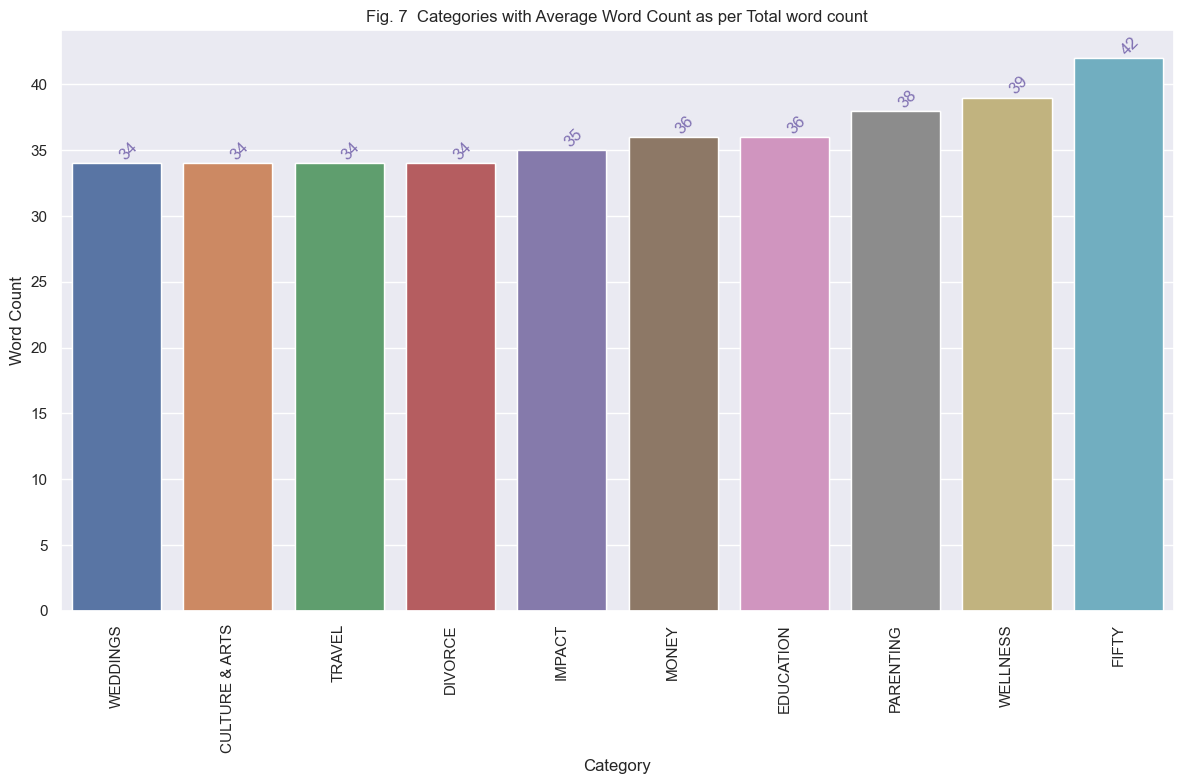

In [91]:

#plt.xticks(rotation=60,fontsize = 10)
author_count.columns = ['category', 'Total_Word_Count']
avg_word_length_by_category_top10 = avg_word_length_by_category_top10.sort_values(['Total_Word_Count']).reset_index(drop=True)
plt.figure(figsize=(12,8))
plt.title("Fig. 7  Categories with Average Word Count as per Total word count")
ax = sns.barplot(avg_word_length_by_category_top10.index, avg_word_length_by_category_top10.Total_Word_Count)
sns.barplot(data=avg_word_length_by_category_top10, x="category", y="Total_Word_Count")
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Category", ylabel='Word Count')
ax.set_xticklabels(avg_word_length_by_category_top10.category)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(avg_word_length_by_category_top10["Total_Word_Count"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()


In [92]:
#data Cleaning / preprocessing

In [93]:
def expand_contractions(combined_words):
    expanded_words = []   
    for word in combined_words.split():
        expanded_words.append(contractions.fix(word))  
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [94]:
stop_words = set(stopwords.words('english'))

In [95]:
def remove_stop_words(x):
    lst = [i for i in x.split() if not i in stop_words]
    data = ' '.join(lst)
    return data

In [96]:
def clean_data(data):
    data = str(data)
    data = data.lower()
    data = expand_contractions(data)
    data = re.sub('@[A-Za-z0-9_]+',' ', data)
    data = re.sub('#[A-Za-z0-9_]+',' ', data)
    data = re.sub('(http\S+)', ' ', data)
    data = re.sub('www.\S+', ' ', data)
    data = re.sub('[()!?]', ' ', data)
    data = re.sub('\[.*?\]',' ', data)
    data = re.sub('[^a-z0-9]',' ', data)
    data = re.sub(' +',' ', data)
    data = remove_stop_words(data)
    return data

In [97]:
clean_df = df.loc[:,['all_words','category']]

In [98]:
clean_df['clean_all_words'] = clean_df['all_words'].apply(clean_data)

In [99]:
clean_df

,all_words,category,clean_all_words
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,4 million americans roll sleeves omicron targe...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,american airlines flyer charged banned life pu...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,23 funniest tweets cats dogs week sept 17 23 d...
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,funniest tweets parents week sept 17 23 accide...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,woman called cops black bird watcher loses law...
...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,rim ceo thorsten heins significant plans black...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,maria sharapova stunned victoria azarenka aust...
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,giants patriots jets colts among improbable su...
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,aldon smith arrested 49ers linebacker busted d...


In [100]:
clean_df.loc[:,['all_words','clean_all_words']]

,all_words,clean_all_words
0,Over 4 Million Americans Roll Up Sleeves For O...,4 million americans roll sleeves omicron targe...
1,"American Airlines Flyer Charged, Banned For Li...",american airlines flyer charged banned life pu...
2,23 Of The Funniest Tweets About Cats And Dogs ...,23 funniest tweets cats dogs week sept 17 23 d...
3,The Funniest Tweets From Parents This Week (Se...,funniest tweets parents week sept 17 23 accide...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,woman called cops black bird watcher loses law...
...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,rim ceo thorsten heins significant plans black...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,maria sharapova stunned victoria azarenka aust...
209524,"Giants Over Patriots, Jets Over Colts Among M...",giants patriots jets colts among improbable su...
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,aldon smith arrested 49ers linebacker busted d...


In [101]:
clean_df

,all_words,category,clean_all_words
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,4 million americans roll sleeves omicron targe...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,american airlines flyer charged banned life pu...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,23 funniest tweets cats dogs week sept 17 23 d...
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,funniest tweets parents week sept 17 23 accide...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,woman called cops black bird watcher loses law...
...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,rim ceo thorsten heins significant plans black...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,maria sharapova stunned victoria azarenka aust...
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,giants patriots jets colts among improbable su...
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,aldon smith arrested 49ers linebacker busted d...


In [102]:
X = clean_df['clean_all_words']
label = LabelEncoder()
Y = label.fit_transform(clean_df['category'])

In [103]:
text_all_words = " ".join(clean_all_words for clean_all_words in clean_df.clean_all_words)

In [104]:
import PIL.Image
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_all_words = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_all_words)
# saving the image
word_cloud_all_words.to_file('got.png')

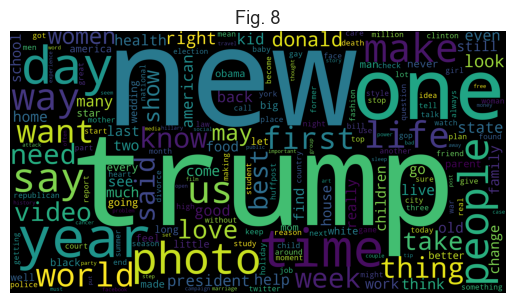

In [105]:
plt.imshow(word_cloud_all_words)
plt.axis("off")
plt.title('Fig. 8', fontsize=13)
plt.show()

In [106]:
# Word Cloud for politics
clean_politics=clean_df[clean_df["category"] == "POLITICS"]

text_politics = " ".join(clean_all_words for clean_all_words in clean_politics.clean_all_words)
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_politics = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_politics)
# saving the image
word_cloud_politics.to_file('Politics_wordCloud.png')


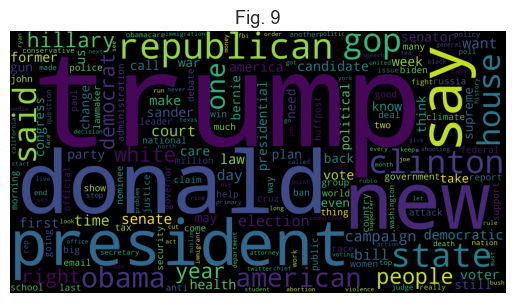

In [107]:
plt.imshow(word_cloud_politics)
plt.axis("off")
plt.title('Fig. 9', fontsize=13)
plt.show()

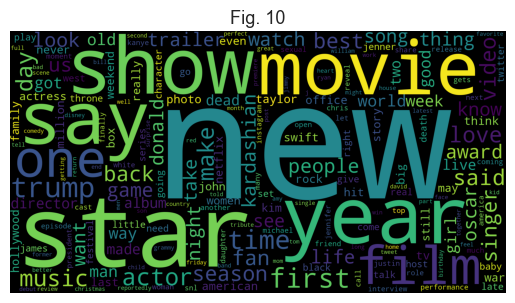

In [108]:
clean_entertainment=clean_df[clean_df["category"] == "ENTERTAINMENT"]
text_entertainment = " ".join(clean_all_words for clean_all_words in clean_entertainment.clean_all_words)
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_entertainment = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_entertainment)
# saving the image
word_cloud_entertainment.to_file('Entertainment_wordCloud.png')
plt.imshow(word_cloud_entertainment)
plt.axis("off")
plt.title('Fig. 10', fontsize=13)
plt.show()


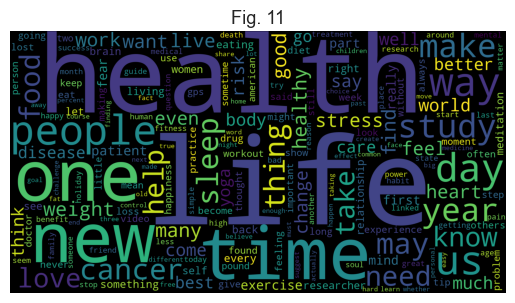

In [109]:
clean_wellness=clean_df[clean_df["category"] == "WELLNESS"]
text_wellness = " ".join(clean_all_words for clean_all_words in clean_wellness.clean_all_words)
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_wellness = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_wellness)
# saving the image
word_cloud_wellness.to_file('Wellness_wordCloud.png')
plt.imshow(word_cloud_wellness)
plt.axis("off")
plt.title('Fig. 11', fontsize=13)
plt.show()


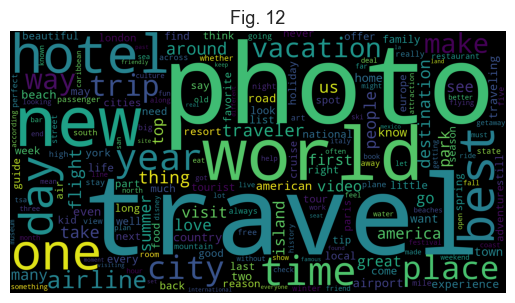

In [110]:
clean_travel=clean_df[clean_df["category"] == "TRAVEL"]
text_travel = " ".join(clean_all_words for clean_all_words in clean_travel.clean_all_words)
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_travel = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_travel)
# saving the image
word_cloud_travel.to_file('Travel_wordCloud.png')
plt.imshow(word_cloud_travel)
plt.axis("off")
plt.title('Fig. 12', fontsize=13)
plt.show()

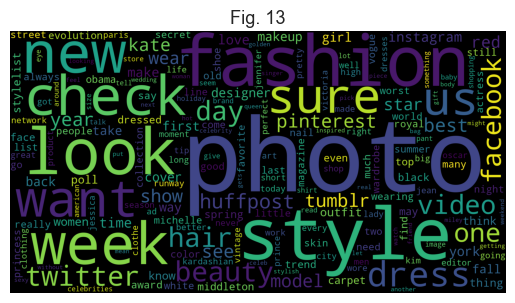

In [111]:
clean_style=clean_df[clean_df["category"] == "STYLE & BEAUTY"]
text_style = " ".join(clean_all_words for clean_all_words in clean_style.clean_all_words)
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_style = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_style)
# saving the image
word_cloud_style.to_file('Style_wordCloud.png')
plt.imshow(word_cloud_style)
plt.axis("off")
plt.title('Fig. 13', fontsize=13)
plt.show()

In [112]:
#Train Test model

In [113]:
x_train,x_test, y_train,y_test = train_test_split(X,Y)

In [45]:
# #Logistic Regression
# from sklearn.linear_model import LogisticRegression

# logreg = Pipeline([('vect', TfidfVectorizer()),
#                 ('clf', LogisticRegression(n_jobs=1, C=1e5)),
#                ])
# logreg.fit(x_train, y_train)
# y_pred = logreg.predict(x_test)

# print('accuracy %s' % accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred, digits=5))

In [46]:
# # SGDClassifier
# from sklearn.linear_model import SGDClassifier

# sgd = Pipeline([('vect', TfidfVectorizer()),
#                 ('clf',  SGDClassifier(loss='hinge', penalty='l2')),
#                ])
# sgd.fit(x_train, y_train)
# y_pred = sgd.predict(x_test)

# print('accuracy %s' % accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred, digits=5))

accuracy 0.4001339456563337
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       353
           1    0.00000   0.00000   0.00000       336
           2    0.00000   0.00000   0.00000      1075
           3    0.76667   0.01546   0.03030      1488
           4    0.00000   0.00000   0.00000       274
           5    0.66667   0.00459   0.00911      1308
           6    0.80952   0.01961   0.03829       867
           7    1.00000   0.00333   0.00664       300
           8    0.95745   0.05468   0.10345       823
           9    0.00000   0.00000   0.00000       228
          10    0.45177   0.76218   0.56729      4289
          11    0.00000   0.00000   0.00000       346
          12    0.00000   0.00000   0.00000       347
          13    0.68952   0.46470   0.55521      1558
          14    0.00000   0.00000   0.00000       346
          15    0.00000   0.00000   0.00000       641
          16    1.00000   0.00234   0.00467      1710

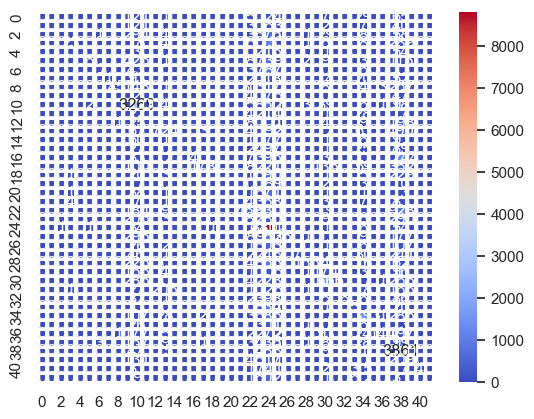

In [116]:
#MultinominalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

nb = Pipeline([('vect', TfidfVectorizer()),
                ('clf', MultinomialNB()),
               ])
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

sns.heatmap(confusion_matrix(y_test, y_pred),cmap = 'coolwarm',annot = True,linewidth = 1,fmt = "d")
plt.show()